<a href="https://colab.research.google.com/github/vmadalasa/EVA4S6/blob/master/FinalEVA4S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [0]:
import data
train_loader, test_loader = data.load()

CUDA Available? True


In [0]:
!pip install tqdm
import test as t
import train

In [0]:
import model as m

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
from torch.optim.lr_scheduler import StepLR

epochs = 25
tasks = {'NoL1_NoL2 with BN':[0,0,False],
         'WithL1_NoL2 with BN':[1e-5,0,False],
         'NoL1_WithL2 with BN':[0,1e-5,False],
         'WithL1_WithL2 with BN':[1e-5,1e-5,False],
         'NoL1_NoL2 with GhostBN':[0,0,True],
         'WithL1_NoL2 with GhostBN':[1e-5,0,True],
         'NoL1_WithL2 with GhostBN':[0,1e-5,True],
         'WithL1_WithL2 with GhostBN':[1e-5,1e-5,True]}
for key,(lam1, lam2, gbn) in tasks.items():
  
  print('-----------------------------------------------------------------------------------------------------')
  print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ', key, ' xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
  print('-----------------------------------------------------------------------------------------------------')
  print('Task being Performed: ', key)
  print('L1 Lambda Value: ', lam1)
  print('L2 Lambda Value: ', lam2)
  if gbn:
    print('GhostBatchNorm')
  else:
    print('BatchNorm')
  
  model = m.Net(gbn).to(device)
  optimizer = train.optimizer(model, lam2)
  scheduler = StepLR(optimizer, step_size= 7, gamma= 0.1)

  for epoch in range(epochs):
    print('EPOCH: ', epoch+1)
    train.train(model, device, train_loader, optimizer, epoch, lam= lam1)
    scheduler.step()
    t.test(model, device, test_loader, key)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  NoL1_NoL2 with BN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  NoL1_NoL2 with BN
L1 Lambda Value:  0
L2 Lambda Value:  0
BatchNorm


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:  1


Loss=0.010278657078742981 Batch_id=937 Accuracy=93.10: 100%|██████████| 938/938 [00:07<00:00, 122.85it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0611, Accuracy: 9821/10000 (98.21%)

EPOCH:  2


Loss=0.020829111337661743 Batch_id=937 Accuracy=98.38: 100%|██████████| 938/938 [00:07<00:00, 126.89it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0374, Accuracy: 9888/10000 (98.88%)

EPOCH:  3


Loss=0.03986082226037979 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [00:06<00:00, 137.98it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0285, Accuracy: 9914/10000 (99.14%)

EPOCH:  4


Loss=0.017809420824050903 Batch_id=937 Accuracy=98.93: 100%|██████████| 938/938 [00:07<00:00, 133.28it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Accuracy: 9900/10000 (99.00%)

EPOCH:  5


Loss=0.051558226346969604 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:06<00:00, 137.97it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0249, Accuracy: 9919/10000 (99.19%)

EPOCH:  6


Loss=0.1724427491426468 Batch_id=937 Accuracy=99.17: 100%|██████████| 938/938 [00:06<00:00, 139.74it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 9916/10000 (99.16%)

EPOCH:  7


Loss=0.0027637779712677 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:06<00:00, 137.22it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 9923/10000 (99.23%)

EPOCH:  8


Loss=0.014886632561683655 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:06<00:00, 142.58it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9938/10000 (99.38%)

EPOCH:  9


Loss=0.018318548798561096 Batch_id=937 Accuracy=99.53: 100%|██████████| 938/938 [00:06<00:00, 141.26it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9943/10000 (99.43%)

EPOCH:  10


Loss=0.020336762070655823 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:06<00:00, 142.74it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9943/10000 (99.43%)

EPOCH:  11


Loss=0.00265657901763916 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:06<00:00, 138.51it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

EPOCH:  12


Loss=0.06892535835504532 Batch_id=937 Accuracy=99.59: 100%|██████████| 938/938 [00:06<00:00, 138.45it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9944/10000 (99.44%)

EPOCH:  13


Loss=0.010776519775390625 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:06<00:00, 141.79it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9941/10000 (99.41%)

EPOCH:  14


Loss=0.000780642032623291 Batch_id=937 Accuracy=99.56: 100%|██████████| 938/938 [00:06<00:00, 139.71it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9941/10000 (99.41%)

EPOCH:  15


Loss=0.008006185293197632 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:06<00:00, 140.55it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

EPOCH:  16


Loss=0.0895577073097229 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:06<00:00, 138.87it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9943/10000 (99.43%)

EPOCH:  17


Loss=0.0068718791007995605 Batch_id=937 Accuracy=99.62: 100%|██████████| 938/938 [00:06<00:00, 137.87it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9943/10000 (99.43%)

EPOCH:  18


Loss=0.04368108510971069 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:06<00:00, 137.98it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9941/10000 (99.41%)

EPOCH:  19


Loss=0.0953415036201477 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:06<00:00, 140.55it/s]    
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9938/10000 (99.38%)

EPOCH:  20


Loss=0.1059751808643341 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:06<00:00, 135.28it/s]    
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9945/10000 (99.45%)

EPOCH:  21


Loss=0.0035894811153411865 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:06<00:00, 136.93it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9940/10000 (99.40%)

EPOCH:  22


Loss=0.0037790685892105103 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:06<00:00, 134.45it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9941/10000 (99.41%)

EPOCH:  23


Loss=0.0011614114046096802 Batch_id=937 Accuracy=99.60: 100%|██████████| 938/938 [00:06<00:00, 140.17it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9942/10000 (99.42%)

EPOCH:  24


Loss=0.00484175980091095 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:06<00:00, 141.75it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9942/10000 (99.42%)

EPOCH:  25


Loss=0.0019185394048690796 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:06<00:00, 136.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9944/10000 (99.44%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  WithL1_NoL2 with BN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  WithL1_NoL2 with BN
L1 Lambda Value:  1e-05
L2 Lambda Value:  0
BatchNorm
EPOCH:  1


Loss=0.22894804179668427 Batch_id=937 Accuracy=92.99: 100%|██████████| 938/938 [00:08<00:00, 106.93it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0496, Accuracy: 9878/10000 (98.78%)

EPOCH:  2


Loss=0.2158402055501938 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [00:09<00:00, 99.33it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0673, Accuracy: 9778/10000 (97.78%)

EPOCH:  3


Loss=0.012919628992676735 Batch_id=937 Accuracy=98.79: 100%|██████████| 938/938 [00:09<00:00, 103.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0310, Accuracy: 9912/10000 (99.12%)

EPOCH:  4


Loss=0.054667457938194275 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:09<00:00, 103.63it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9923/10000 (99.23%)

EPOCH:  5


Loss=0.1297893226146698 Batch_id=937 Accuracy=99.10: 100%|██████████| 938/938 [00:09<00:00, 100.06it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0262, Accuracy: 9920/10000 (99.20%)

EPOCH:  6


Loss=0.020613018423318863 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:09<00:00, 98.87it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9926/10000 (99.26%)

EPOCH:  7


Loss=0.013850637711584568 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [00:09<00:00, 102.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0293, Accuracy: 9913/10000 (99.13%)

EPOCH:  8


Loss=0.027529576793313026 Batch_id=937 Accuracy=99.54: 100%|██████████| 938/938 [00:09<00:00, 98.73it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9936/10000 (99.36%)

EPOCH:  9


Loss=0.02345503866672516 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:11<00:00, 81.64it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9939/10000 (99.39%)

EPOCH:  10


Loss=0.013243869878351688 Batch_id=937 Accuracy=99.62: 100%|██████████| 938/938 [00:10<00:00, 87.96it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9945/10000 (99.45%)

EPOCH:  11


Loss=0.008747216314077377 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:09<00:00, 101.61it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)

EPOCH:  12


Loss=0.012836486101150513 Batch_id=937 Accuracy=99.62: 100%|██████████| 938/938 [00:09<00:00, 102.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9935/10000 (99.35%)

EPOCH:  13


Loss=0.018127458170056343 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:08<00:00, 104.85it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9945/10000 (99.45%)

EPOCH:  14


Loss=0.008518842980265617 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:09<00:00, 102.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9937/10000 (99.37%)

EPOCH:  15


Loss=0.009715544059872627 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:09<00:00, 103.02it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9939/10000 (99.39%)

EPOCH:  16


Loss=0.010746863670647144 Batch_id=937 Accuracy=99.71: 100%|██████████| 938/938 [00:09<00:00, 103.30it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9945/10000 (99.45%)

EPOCH:  17


Loss=0.012629173696041107 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:09<00:00, 103.42it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9943/10000 (99.43%)

EPOCH:  18


Loss=0.009456563740968704 Batch_id=937 Accuracy=99.71: 100%|██████████| 938/938 [00:09<00:00, 102.05it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)

EPOCH:  19


Loss=0.01824987679719925 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:09<00:00, 100.95it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9944/10000 (99.44%)

EPOCH:  20


Loss=0.024343790486454964 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:09<00:00, 99.87it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9942/10000 (99.42%)

EPOCH:  21


Loss=0.010002140887081623 Batch_id=937 Accuracy=99.71: 100%|██████████| 938/938 [00:09<00:00, 102.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9942/10000 (99.42%)

EPOCH:  22


Loss=0.017738983035087585 Batch_id=937 Accuracy=99.70: 100%|██████████| 938/938 [00:09<00:00, 100.40it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9944/10000 (99.44%)

EPOCH:  23


Loss=0.009473218582570553 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:09<00:00, 99.12it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9942/10000 (99.42%)

EPOCH:  24


Loss=0.015643827617168427 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:09<00:00, 99.34it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9943/10000 (99.43%)

EPOCH:  25


Loss=0.014093920588493347 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:09<00:00, 100.81it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9942/10000 (99.42%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  NoL1_WithL2 with BN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  NoL1_WithL2 with BN
L1 Lambda Value:  0
L2 Lambda Value:  1e-05
BatchNorm
EPOCH:  1


Loss=0.03722197562456131 Batch_id=937 Accuracy=93.55: 100%|██████████| 938/938 [00:07<00:00, 133.04it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0581, Accuracy: 9830/10000 (98.30%)

EPOCH:  2


Loss=0.05061299353837967 Batch_id=937 Accuracy=98.35: 100%|██████████| 938/938 [00:07<00:00, 131.11it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0503, Accuracy: 9850/10000 (98.50%)

EPOCH:  3


Loss=0.01796058565378189 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [00:07<00:00, 132.76it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9914/10000 (99.14%)

EPOCH:  4


Loss=0.1071585863828659 Batch_id=937 Accuracy=98.93: 100%|██████████| 938/938 [00:07<00:00, 133.02it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0315, Accuracy: 9899/10000 (98.99%)

EPOCH:  5


Loss=0.0056795477867126465 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [00:07<00:00, 131.27it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9912/10000 (99.12%)

EPOCH:  6


Loss=0.01965506374835968 Batch_id=937 Accuracy=99.09: 100%|██████████| 938/938 [00:07<00:00, 129.77it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9913/10000 (99.13%)

EPOCH:  7


Loss=0.024546422064304352 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [00:07<00:00, 128.16it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9902/10000 (99.02%)

EPOCH:  8


Loss=0.0027818232774734497 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:07<00:00, 129.26it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9938/10000 (99.38%)

EPOCH:  9


Loss=0.0022340863943099976 Batch_id=937 Accuracy=99.54: 100%|██████████| 938/938 [00:07<00:00, 133.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9937/10000 (99.37%)

EPOCH:  10


Loss=0.010128721594810486 Batch_id=937 Accuracy=99.53: 100%|██████████| 938/938 [00:07<00:00, 133.39it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9944/10000 (99.44%)

EPOCH:  11


Loss=0.12781983613967896 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:07<00:00, 129.46it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9939/10000 (99.39%)

EPOCH:  12


Loss=0.01574172079563141 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:07<00:00, 131.40it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9942/10000 (99.42%)

EPOCH:  13


Loss=0.0005801469087600708 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:07<00:00, 125.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9942/10000 (99.42%)

EPOCH:  14


Loss=0.021119534969329834 Batch_id=937 Accuracy=99.59: 100%|██████████| 938/938 [00:07<00:00, 127.49it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9944/10000 (99.44%)

EPOCH:  15


Loss=0.0035565048456192017 Batch_id=937 Accuracy=99.59: 100%|██████████| 938/938 [00:07<00:00, 125.88it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9946/10000 (99.46%)

EPOCH:  16


Loss=0.0037810206413269043 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:07<00:00, 131.24it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9942/10000 (99.42%)

EPOCH:  17


Loss=0.004984632134437561 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:07<00:00, 129.64it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9944/10000 (99.44%)

EPOCH:  18


Loss=0.041014283895492554 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:07<00:00, 133.95it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9944/10000 (99.44%)

EPOCH:  19


Loss=0.08200091123580933 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:07<00:00, 132.39it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9941/10000 (99.41%)

EPOCH:  20


Loss=0.02572116255760193 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:07<00:00, 127.00it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9942/10000 (99.42%)

EPOCH:  21


Loss=0.05456338822841644 Batch_id=937 Accuracy=99.62: 100%|██████████| 938/938 [00:07<00:00, 126.91it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9936/10000 (99.36%)

EPOCH:  22


Loss=0.0032746195793151855 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:07<00:00, 132.73it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9944/10000 (99.44%)

EPOCH:  23


Loss=0.00442640483379364 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:07<00:00, 131.60it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9944/10000 (99.44%)

EPOCH:  24


Loss=0.10683824867010117 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:07<00:00, 131.33it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9940/10000 (99.40%)

EPOCH:  25


Loss=0.02803865075111389 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:07<00:00, 131.44it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9944/10000 (99.44%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  WithL1_WithL2 with BN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  WithL1_WithL2 with BN
L1 Lambda Value:  1e-05
L2 Lambda Value:  1e-05
BatchNorm
EPOCH:  1


Loss=0.026273071765899658 Batch_id=937 Accuracy=93.06: 100%|██████████| 938/938 [00:09<00:00, 97.63it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0542, Accuracy: 9847/10000 (98.47%)

EPOCH:  2


Loss=0.038828711956739426 Batch_id=937 Accuracy=98.33: 100%|██████████| 938/938 [00:09<00:00, 98.91it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0385, Accuracy: 9886/10000 (98.86%)

EPOCH:  3


Loss=0.10712531954050064 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [00:09<00:00, 100.78it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0331, Accuracy: 9896/10000 (98.96%)

EPOCH:  4


Loss=0.04047601670026779 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [00:09<00:00, 94.78it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9921/10000 (99.21%)

EPOCH:  5


Loss=0.016803497448563576 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:09<00:00, 98.49it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0297, Accuracy: 9901/10000 (99.01%)

EPOCH:  6


Loss=0.1117120236158371 Batch_id=937 Accuracy=99.10: 100%|██████████| 938/938 [00:09<00:00, 96.44it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 9928/10000 (99.28%)

EPOCH:  7


Loss=0.05375707149505615 Batch_id=937 Accuracy=99.18: 100%|██████████| 938/938 [00:09<00:00, 96.62it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9931/10000 (99.31%)

EPOCH:  8


Loss=0.015471895225346088 Batch_id=937 Accuracy=99.43: 100%|██████████| 938/938 [00:09<00:00, 99.36it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9942/10000 (99.42%)

EPOCH:  9


Loss=0.014760272577404976 Batch_id=937 Accuracy=99.53: 100%|██████████| 938/938 [00:09<00:00, 100.31it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9940/10000 (99.40%)

EPOCH:  10


Loss=0.01022854819893837 Batch_id=937 Accuracy=99.57: 100%|██████████| 938/938 [00:09<00:00, 94.40it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9941/10000 (99.41%)

EPOCH:  11


Loss=0.010641153901815414 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:09<00:00, 98.82it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9936/10000 (99.36%)

EPOCH:  12


Loss=0.00858401507139206 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:09<00:00, 98.75it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9935/10000 (99.35%)

EPOCH:  13


Loss=0.011215124279260635 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:09<00:00, 102.40it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9947/10000 (99.47%)

EPOCH:  14


Loss=0.013696945272386074 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:09<00:00, 95.70it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9939/10000 (99.39%)

EPOCH:  15


Loss=0.010312510654330254 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:09<00:00, 96.67it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9944/10000 (99.44%)

EPOCH:  16


Loss=0.013179225847125053 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:09<00:00, 97.88it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9944/10000 (99.44%)

EPOCH:  17


Loss=0.008588068187236786 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:09<00:00, 96.96it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9939/10000 (99.39%)

EPOCH:  18


Loss=0.024670688435435295 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:09<00:00, 98.26it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9943/10000 (99.43%)

EPOCH:  19


Loss=0.014547206461429596 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:10<00:00, 88.68it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9942/10000 (99.42%)

EPOCH:  20


Loss=0.04979139193892479 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:12<00:00, 74.50it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9942/10000 (99.42%)

EPOCH:  21


Loss=0.019797751680016518 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:12<00:00, 72.75it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9947/10000 (99.47%)

EPOCH:  22


Loss=0.06735262274742126 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:10<00:00, 86.07it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9944/10000 (99.44%)

EPOCH:  23


Loss=0.010863406583666801 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:13<00:00, 67.16it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9940/10000 (99.40%)

EPOCH:  24


Loss=0.020607851445674896 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:11<00:00, 85.07it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9941/10000 (99.41%)

EPOCH:  25


Loss=0.01657354086637497 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:12<00:00, 73.35it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9945/10000 (99.45%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  NoL1_NoL2 with GhostBN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  NoL1_NoL2 with GhostBN
L1 Lambda Value:  0
L2 Lambda Value:  0
GhostBatchNorm
EPOCH:  1


Loss=0.056745149195194244 Batch_id=937 Accuracy=91.41: 100%|██████████| 938/938 [00:10<00:00, 90.84it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0450, Accuracy: 9859/10000 (98.59%)

EPOCH:  2


Loss=0.08969275653362274 Batch_id=937 Accuracy=97.75: 100%|██████████| 938/938 [00:08<00:00, 111.41it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0401, Accuracy: 9869/10000 (98.69%)

EPOCH:  3


Loss=0.06776770949363708 Batch_id=937 Accuracy=98.21: 100%|██████████| 938/938 [00:10<00:00, 86.00it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0445, Accuracy: 9869/10000 (98.69%)

EPOCH:  4


Loss=0.03748118877410889 Batch_id=937 Accuracy=98.47: 100%|██████████| 938/938 [00:10<00:00, 93.53it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9884/10000 (98.84%)

EPOCH:  5


Loss=0.024185791611671448 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [00:09<00:00, 102.51it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0296, Accuracy: 9898/10000 (98.98%)

EPOCH:  6


Loss=0.2272283285856247 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [00:11<00:00, 83.45it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0283, Accuracy: 9907/10000 (99.07%)

EPOCH:  7


Loss=0.09030013531446457 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [00:09<00:00, 95.57it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0236, Accuracy: 9933/10000 (99.33%)

EPOCH:  8


Loss=0.006092920899391174 Batch_id=937 Accuracy=99.18: 100%|██████████| 938/938 [00:10<00:00, 93.48it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9939/10000 (99.39%)

EPOCH:  9


Loss=0.07195387780666351 Batch_id=937 Accuracy=99.26: 100%|██████████| 938/938 [00:10<00:00, 86.43it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9941/10000 (99.41%)

EPOCH:  10


Loss=0.005252942442893982 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:08<00:00, 107.24it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9941/10000 (99.41%)

EPOCH:  11


Loss=0.02367343008518219 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:10<00:00, 85.68it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9945/10000 (99.45%)

EPOCH:  12


Loss=0.007199212908744812 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:10<00:00, 92.18it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9947/10000 (99.47%)

EPOCH:  13


Loss=0.006952911615371704 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:09<00:00, 102.93it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9940/10000 (99.40%)

EPOCH:  14


Loss=0.029292330145835876 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:11<00:00, 84.42it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9945/10000 (99.45%)

EPOCH:  15


Loss=0.14558938145637512 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:09<00:00, 95.28it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9942/10000 (99.42%)

EPOCH:  16


Loss=0.09675702452659607 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:10<00:00, 93.46it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9945/10000 (99.45%)

EPOCH:  17


Loss=0.029056698083877563 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:11<00:00, 83.37it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9945/10000 (99.45%)

EPOCH:  18


Loss=0.013569965958595276 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:08<00:00, 106.51it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9947/10000 (99.47%)

EPOCH:  19


Loss=0.04921247065067291 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:11<00:00, 83.72it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9948/10000 (99.48%)

EPOCH:  20


Loss=0.005864381790161133 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:09<00:00, 95.86it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)

EPOCH:  21


Loss=0.057201895862817764 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:08<00:00, 104.42it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9946/10000 (99.46%)

EPOCH:  22


Loss=0.024956777691841125 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:11<00:00, 84.04it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9947/10000 (99.47%)

EPOCH:  23


Loss=0.024375319480895996 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:09<00:00, 102.83it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9945/10000 (99.45%)

EPOCH:  24


Loss=0.0042575448751449585 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:10<00:00, 89.01it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9945/10000 (99.45%)

EPOCH:  25


Loss=0.007644146680831909 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:11<00:00, 83.62it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9947/10000 (99.47%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  WithL1_NoL2 with GhostBN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  WithL1_NoL2 with GhostBN
L1 Lambda Value:  1e-05
L2 Lambda Value:  0
GhostBatchNorm
EPOCH:  1


Loss=0.10615400969982147 Batch_id=937 Accuracy=91.66: 100%|██████████| 938/938 [00:12<00:00, 76.58it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0675, Accuracy: 9791/10000 (97.91%)

EPOCH:  2


Loss=0.022305037826299667 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:14<00:00, 65.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9908/10000 (99.08%)

EPOCH:  3


Loss=0.1585569530725479 Batch_id=937 Accuracy=98.36: 100%|██████████| 938/938 [00:11<00:00, 78.99it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Accuracy: 9905/10000 (99.05%)

EPOCH:  4


Loss=0.191635400056839 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [00:14<00:00, 65.20it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0308, Accuracy: 9913/10000 (99.13%)

EPOCH:  5


Loss=0.13584409654140472 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [00:11<00:00, 80.90it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 9909/10000 (99.09%)

EPOCH:  6


Loss=0.014609557576477528 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:15<00:00, 61.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 9927/10000 (99.27%)

EPOCH:  7


Loss=0.06343638151884079 Batch_id=937 Accuracy=98.93: 100%|██████████| 938/938 [00:11<00:00, 81.84it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9935/10000 (99.35%)

EPOCH:  8


Loss=0.07495187968015671 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:14<00:00, 64.33it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9949/10000 (99.49%)

EPOCH:  9


Loss=0.019071880728006363 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:11<00:00, 78.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9951/10000 (99.51%)

EPOCH:  10


Loss=0.05632324516773224 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:14<00:00, 64.36it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9949/10000 (99.49%)

EPOCH:  11


Loss=0.16384431719779968 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:12<00:00, 77.92it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 9951/10000 (99.51%)

EPOCH:  12


Loss=0.012622558511793613 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:14<00:00, 62.74it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9947/10000 (99.47%)

EPOCH:  13


Loss=0.04126304015517235 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:12<00:00, 78.04it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9949/10000 (99.49%)

EPOCH:  14


Loss=0.016914332285523415 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:14<00:00, 63.17it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9954/10000 (99.54%)

EPOCH:  15


Loss=0.04320695623755455 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:11<00:00, 80.76it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9948/10000 (99.48%)

EPOCH:  16


Loss=0.013428976759314537 Batch_id=937 Accuracy=99.43: 100%|██████████| 938/938 [00:14<00:00, 62.65it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 9948/10000 (99.48%)

EPOCH:  17


Loss=0.06019990146160126 Batch_id=937 Accuracy=99.46: 100%|██████████| 938/938 [00:11<00:00, 78.94it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9952/10000 (99.52%)

EPOCH:  18


Loss=0.05071684345602989 Batch_id=937 Accuracy=99.48: 100%|██████████| 938/938 [00:14<00:00, 63.67it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 9951/10000 (99.51%)

EPOCH:  19


Loss=0.04872877895832062 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:12<00:00, 77.13it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 9952/10000 (99.52%)

EPOCH:  20


Loss=0.035804033279418945 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:14<00:00, 63.33it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9948/10000 (99.48%)

EPOCH:  21


Loss=0.04744962602853775 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:12<00:00, 75.69it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9950/10000 (99.50%)

EPOCH:  22


Loss=0.02472112700343132 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:14<00:00, 62.81it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 9950/10000 (99.50%)

EPOCH:  23


Loss=0.012582861818373203 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:12<00:00, 74.56it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9947/10000 (99.47%)

EPOCH:  24


Loss=0.009516453370451927 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:14<00:00, 63.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 9950/10000 (99.50%)

EPOCH:  25


Loss=0.010852031409740448 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:12<00:00, 77.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 9950/10000 (99.50%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  NoL1_WithL2 with GhostBN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  NoL1_WithL2 with GhostBN
L1 Lambda Value:  0
L2 Lambda Value:  1e-05
GhostBatchNorm
EPOCH:  1


Loss=0.1811184585094452 Batch_id=937 Accuracy=91.16: 100%|██████████| 938/938 [00:11<00:00, 82.66it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0530, Accuracy: 9851/10000 (98.51%)

EPOCH:  2


Loss=0.2050631046295166 Batch_id=937 Accuracy=97.87: 100%|██████████| 938/938 [00:10<00:00, 86.93it/s]    
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0402, Accuracy: 9876/10000 (98.76%)

EPOCH:  3


Loss=0.1296200454235077 Batch_id=937 Accuracy=98.33: 100%|██████████| 938/938 [00:10<00:00, 93.57it/s]    
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0369, Accuracy: 9881/10000 (98.81%)

EPOCH:  4


Loss=0.03920601308345795 Batch_id=937 Accuracy=98.62: 100%|██████████| 938/938 [00:12<00:00, 77.29it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9917/10000 (99.17%)

EPOCH:  5


Loss=0.09699420630931854 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [00:09<00:00, 98.03it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 9932/10000 (99.32%)

EPOCH:  6


Loss=0.0756487101316452 Batch_id=937 Accuracy=98.90: 100%|██████████| 938/938 [00:11<00:00, 78.73it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9931/10000 (99.31%)

EPOCH:  7


Loss=0.0525885671377182 Batch_id=937 Accuracy=98.90: 100%|██████████| 938/938 [00:10<00:00, 87.70it/s]    
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9911/10000 (99.11%)

EPOCH:  8


Loss=0.00541512668132782 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:10<00:00, 87.21it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9950/10000 (99.50%)

EPOCH:  9


Loss=0.04847622662782669 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:11<00:00, 79.28it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9949/10000 (99.49%)

EPOCH:  10


Loss=0.003980427980422974 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:09<00:00, 101.91it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9952/10000 (99.52%)

EPOCH:  11


Loss=0.09848607331514359 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:11<00:00, 78.64it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9956/10000 (99.56%)

EPOCH:  12


Loss=0.015613362193107605 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:09<00:00, 96.71it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9949/10000 (99.49%)

EPOCH:  13


Loss=0.0021462440490722656 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:11<00:00, 83.17it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9950/10000 (99.50%)

EPOCH:  14


Loss=0.005440756678581238 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:11<00:00, 83.20it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9952/10000 (99.52%)

EPOCH:  15


Loss=0.04432842135429382 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:10<00:00, 93.26it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9950/10000 (99.50%)

EPOCH:  16


Loss=0.012561753392219543 Batch_id=937 Accuracy=99.48: 100%|██████████| 938/938 [00:12<00:00, 75.73it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9953/10000 (99.53%)

EPOCH:  17


Loss=0.02251972258090973 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:10<00:00, 93.50it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9951/10000 (99.51%)

EPOCH:  18


Loss=0.07718135416507721 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:12<00:00, 77.80it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9952/10000 (99.52%)

EPOCH:  19


Loss=0.0627497211098671 Batch_id=937 Accuracy=99.46: 100%|██████████| 938/938 [00:10<00:00, 89.78it/s]    
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9951/10000 (99.51%)

EPOCH:  20


Loss=0.08352658897638321 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:10<00:00, 90.69it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9950/10000 (99.50%)

EPOCH:  21


Loss=0.047617107629776 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:12<00:00, 77.79it/s]     
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9950/10000 (99.50%)

EPOCH:  22


Loss=0.041322559118270874 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:08<00:00, 107.76it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9954/10000 (99.54%)

EPOCH:  23


Loss=0.030112236738204956 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:11<00:00, 79.11it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9952/10000 (99.52%)

EPOCH:  24


Loss=0.015419185161590576 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:10<00:00, 88.40it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9951/10000 (99.51%)

EPOCH:  25


Loss=0.10854852199554443 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:09<00:00, 95.13it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9952/10000 (99.52%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  WithL1_WithL2 with GhostBN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  WithL1_WithL2 with GhostBN
L1 Lambda Value:  1e-05
L2 Lambda Value:  1e-05
GhostBatchNorm
EPOCH:  1


Loss=0.11312037706375122 Batch_id=937 Accuracy=91.78: 100%|██████████| 938/938 [00:14<00:00, 62.67it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0487, Accuracy: 9859/10000 (98.59%)

EPOCH:  2


Loss=0.209456667304039 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [00:13<00:00, 71.00it/s]   
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0458, Accuracy: 9861/10000 (98.61%)

EPOCH:  3


Loss=0.09901910275220871 Batch_id=937 Accuracy=98.38: 100%|██████████| 938/938 [00:15<00:00, 62.10it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 9879/10000 (98.79%)

EPOCH:  4


Loss=0.04920527711510658 Batch_id=937 Accuracy=98.50: 100%|██████████| 938/938 [00:13<00:00, 71.18it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9911/10000 (99.11%)

EPOCH:  5


Loss=0.10940967500209808 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [00:15<00:00, 62.49it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0331, Accuracy: 9901/10000 (99.01%)

EPOCH:  6


Loss=0.10130132734775543 Batch_id=937 Accuracy=98.78: 100%|██████████| 938/938 [00:13<00:00, 71.43it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9931/10000 (99.31%)

EPOCH:  7


Loss=0.049748849123716354 Batch_id=937 Accuracy=98.90: 100%|██████████| 938/938 [00:14<00:00, 64.39it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9933/10000 (99.33%)

EPOCH:  8


Loss=0.03045225702226162 Batch_id=937 Accuracy=99.19: 100%|██████████| 938/938 [00:13<00:00, 71.01it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9937/10000 (99.37%)

EPOCH:  9


Loss=0.013262017630040646 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:14<00:00, 63.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9940/10000 (99.40%)

EPOCH:  10


Loss=0.021958451718091965 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:13<00:00, 70.56it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9941/10000 (99.41%)

EPOCH:  11


Loss=0.01814933866262436 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:14<00:00, 64.74it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9943/10000 (99.43%)

EPOCH:  12


Loss=0.09091202914714813 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:13<00:00, 70.45it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9944/10000 (99.44%)

EPOCH:  13


Loss=0.026939261704683304 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:14<00:00, 65.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9946/10000 (99.46%)

EPOCH:  14


Loss=0.0913061797618866 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:14<00:00, 65.43it/s]  
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9939/10000 (99.39%)

EPOCH:  15


Loss=0.018699197098612785 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:13<00:00, 69.06it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9941/10000 (99.41%)

EPOCH:  16


Loss=0.018512114882469177 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:14<00:00, 64.20it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9944/10000 (99.44%)

EPOCH:  17


Loss=0.20543460547924042 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:13<00:00, 71.80it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9944/10000 (99.44%)

EPOCH:  18


Loss=0.040247730910778046 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:15<00:00, 60.86it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9941/10000 (99.41%)

EPOCH:  19


Loss=0.027374181896448135 Batch_id=937 Accuracy=99.43: 100%|██████████| 938/938 [00:12<00:00, 75.30it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9945/10000 (99.45%)

EPOCH:  20


Loss=0.017398351803421974 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:14<00:00, 62.89it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9945/10000 (99.45%)

EPOCH:  21


Loss=0.10866496711969376 Batch_id=937 Accuracy=99.46: 100%|██████████| 938/938 [00:12<00:00, 72.52it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9944/10000 (99.44%)

EPOCH:  22


Loss=0.020082034170627594 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:15<00:00, 61.70it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9945/10000 (99.45%)

EPOCH:  23


Loss=0.11950395256280899 Batch_id=937 Accuracy=99.43: 100%|██████████| 938/938 [00:13<00:00, 72.06it/s] 
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

EPOCH:  24


Loss=0.014795197173953056 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:15<00:00, 58.70it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

EPOCH:  25


Loss=0.015667084604501724 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:13<00:00, 70.56it/s]



Test set: Average loss: 0.0172, Accuracy: 9947/10000 (99.47%)



In [0]:
list1 = ['NoL1_NoL2 with BN','WithL1_NoL2 with BN','NoL1_WithL2 with BN','WithL1_WithL2 with BN','NoL1_NoL2 with GhostBN','WithL1_NoL2 with GhostBN','NoL1_WithL2 with GhostBN','WithL1_WithL2 with GhostBN']
i= 0
for l in list1:
    print('Tha max acc for', l, 'is: ', max(t.test_acc[i:i+25]))
    i+=25
print('The overall max acc is: ', max(t.test_acc), ' at index ', t.test_acc.index(max(t.test_acc)) )

Tha max acc for NoL1_NoL2 with BN is:  99.45
Tha max acc for WithL1_NoL2 with BN is:  99.46
Tha max acc for NoL1_WithL2 with BN is:  99.46
Tha max acc for WithL1_WithL2 with BN is:  99.47
Tha max acc for NoL1_NoL2 with GhostBN is:  99.48
Tha max acc for WithL1_NoL2 with GhostBN is:  99.54
Tha max acc for NoL1_WithL2 with GhostBN is:  99.56
Tha max acc for WithL1_WithL2 with GhostBN is:  99.47
The overall max acc is:  99.56  at index  160


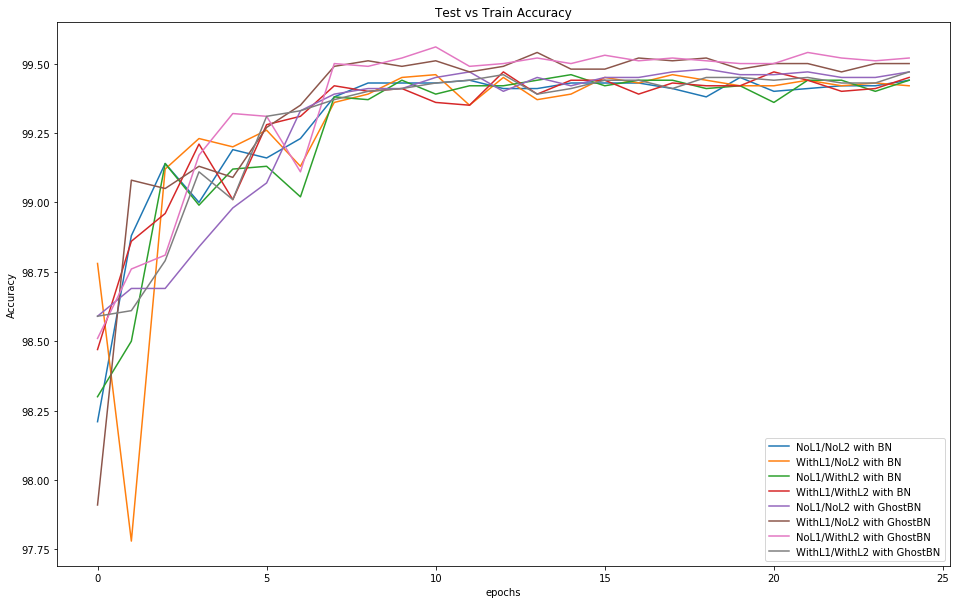

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,10))
plt.axes(xlabel= 'epochs', ylabel= 'Accuracy')
i = 0
for i in range(0,200,25):
    plt.plot(t.test_acc[i:i+25])
plt.title('Test vs Train Accuracy')
plt.legend(['NoL1/NoL2 with BN',
         'WithL1/NoL2 with BN',
         'NoL1/WithL2 with BN',
         'WithL1/WithL2 with BN',
         'NoL1/NoL2 with GhostBN',
         'WithL1/NoL2 with GhostBN',
         'NoL1/WithL2 with GhostBN',
         'WithL1/WithL2 with GhostBN'])

In [0]:
list1 = ['NoL1_NoL2 with BN','WithL1_NoL2 with BN','NoL1_WithL2 with BN','WithL1_WithL2 with BN','NoL1_NoL2 with GhostBN','WithL1_NoL2 with GhostBN','NoL1_WithL2 with GhostBN','WithL1_WithL2 with GhostBN']
i= 0
for l in list1:
    print('Tha min loss for', l, 'is: ', min(t.test_loss[i:i+25]))
    i+=25
print('The overall min loss is: ', min(t.test_loss), ' at index ', t.test_loss.index(min(t.test_loss)) )

Tha min loss for NoL1_NoL2 with BN is:  0.017138663053512575
Tha min loss for WithL1_NoL2 with BN is:  0.01711288378238678
Tha min loss for NoL1_WithL2 with BN is:  0.01704927146434784
Tha min loss for WithL1_WithL2 with BN is:  0.017386202383041383
Tha min loss for NoL1_NoL2 with GhostBN is:  0.017153030371665955
Tha min loss for WithL1_NoL2 with GhostBN is:  0.016235638618469238
Tha min loss for NoL1_WithL2 with GhostBN is:  0.016875307750701906
Tha min loss for WithL1_WithL2 with GhostBN is:  0.01724003961086273
The overall min loss is:  0.016235638618469238  at index  149


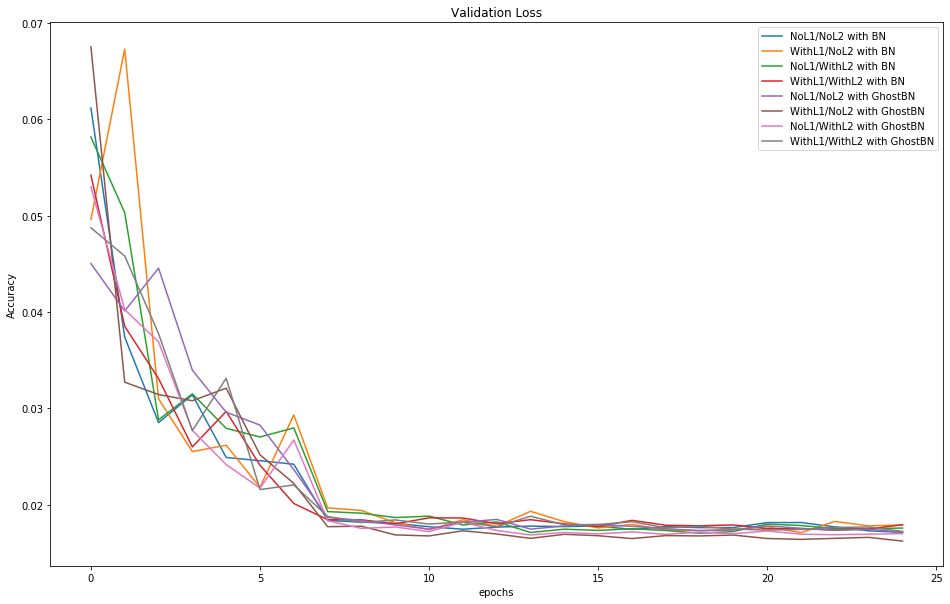

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,10))
plt.axes(xlabel= 'epochs', ylabel= 'Accuracy')
i = 0
for i in range(0,200,25):
    plt.plot(t.test_loss[i:i+25])
plt.title('Validation Loss')
plt.legend(['NoL1/NoL2 with BN',
         'WithL1/NoL2 with BN',
         'NoL1/WithL2 with BN',
         'WithL1/WithL2 with BN',
         'NoL1/NoL2 with GhostBN',
         'WithL1/NoL2 with GhostBN',
         'NoL1/WithL2 with GhostBN',
         'WithL1/WithL2 with GhostBN'])

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
list1 = ['NoL1_NoL2 with BN','WithL1_NoL2 with BN','NoL1_WithL2 with BN','WithL1_WithL2 with BN','NoL1_NoL2 with GhostBN','WithL1_NoL2 with GhostBN','NoL1_WithL2 with GhostBN','WithL1_WithL2 with GhostBN']
for i, l in enumerate(list1):
    path = 'savedmodel/'+l+' classifier.pt'
    if i<4:
        h = m.Net(gbn= False).to(device)
    else:
        h = m.Net(gbn= True).to(device)
    h.load_state_dict(torch.load(path))
    h.eval()
    t.test(h, device, test_loader, key=l)


Test set: Average loss: 0.0176, Accuracy: 9945/10000 (99.45%)


Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)


Test set: Average loss: 0.0175, Accuracy: 9946/10000 (99.46%)


Test set: Average loss: 0.0180, Accuracy: 9947/10000 (99.47%)


Test set: Average loss: 0.0173, Accuracy: 9948/10000 (99.48%)


Test set: Average loss: 0.0165, Accuracy: 9954/10000 (99.54%)


Test set: Average loss: 0.0172, Accuracy: 9956/10000 (99.56%)


Test set: Average loss: 0.0172, Accuracy: 9947/10000 (99.47%)




Test set: Average loss: 0.0176, Accuracy: 9945/10000 (99.45%)


Test set: Average loss: 0.0173, Accuracy: 9948/10000 (99.48%)



<Figure size 432x288 with 0 Axes>

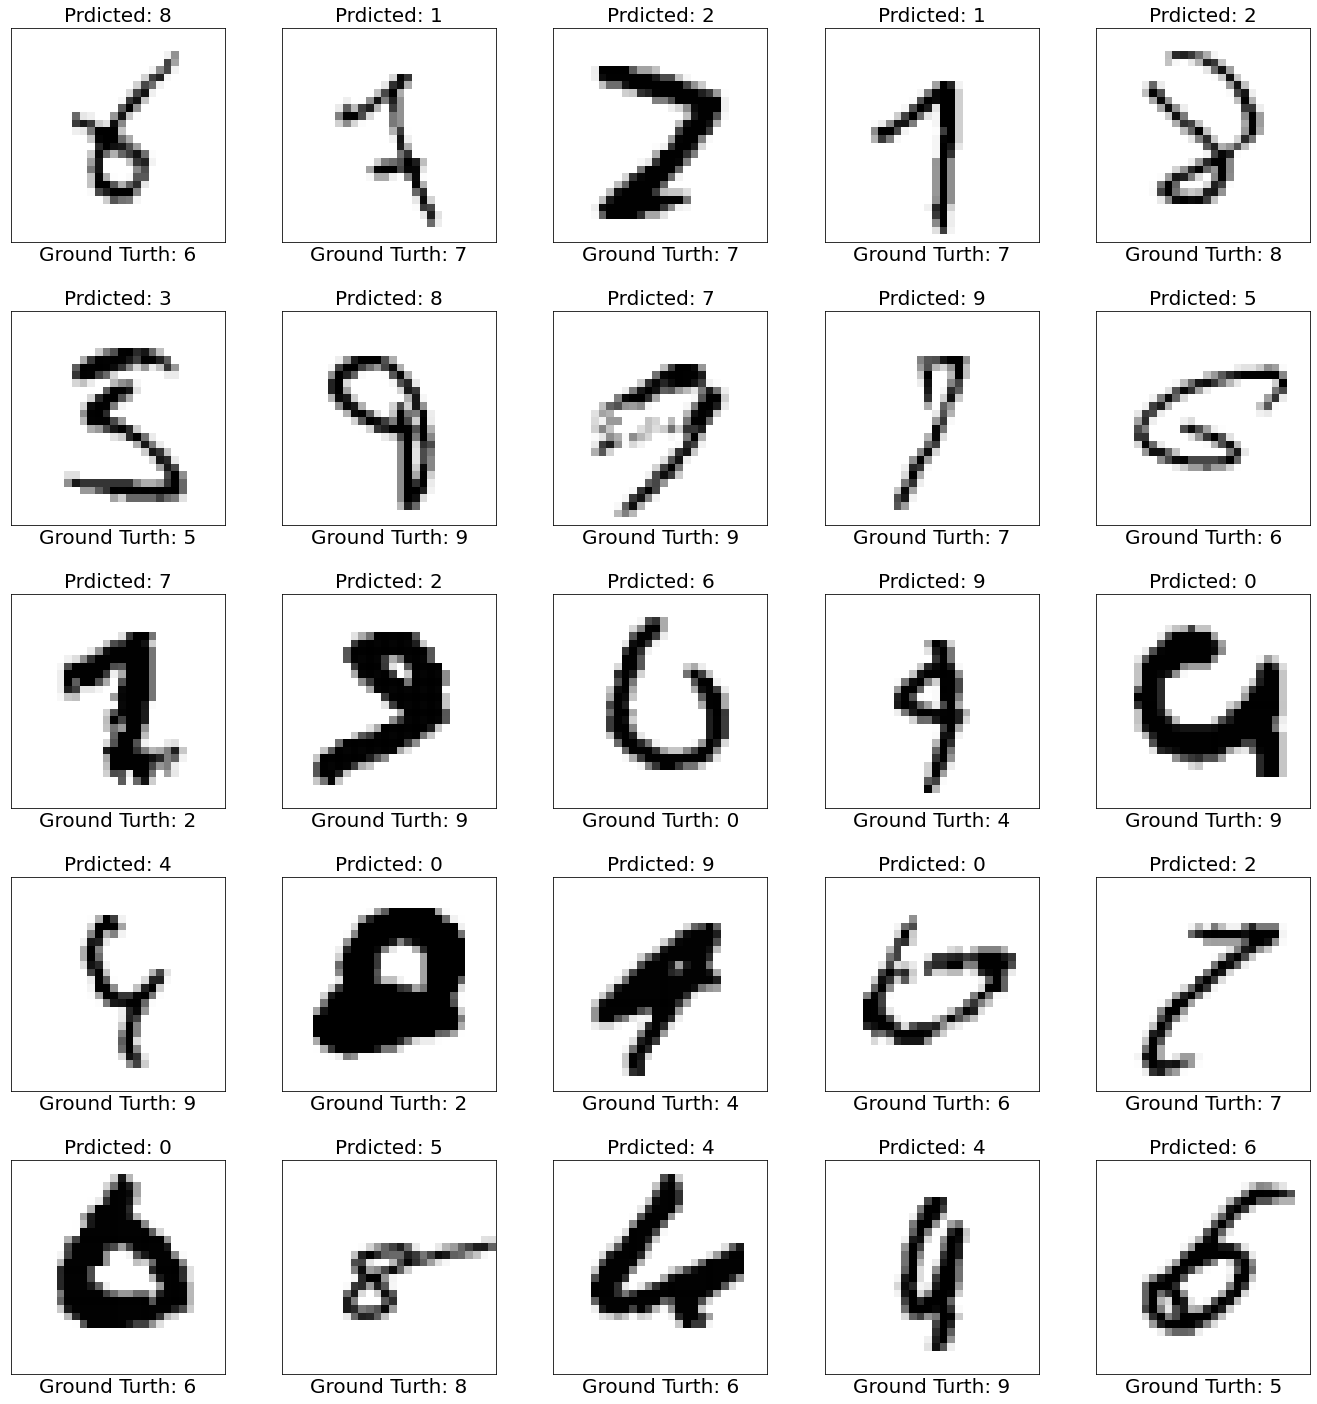

<Figure size 432x288 with 0 Axes>

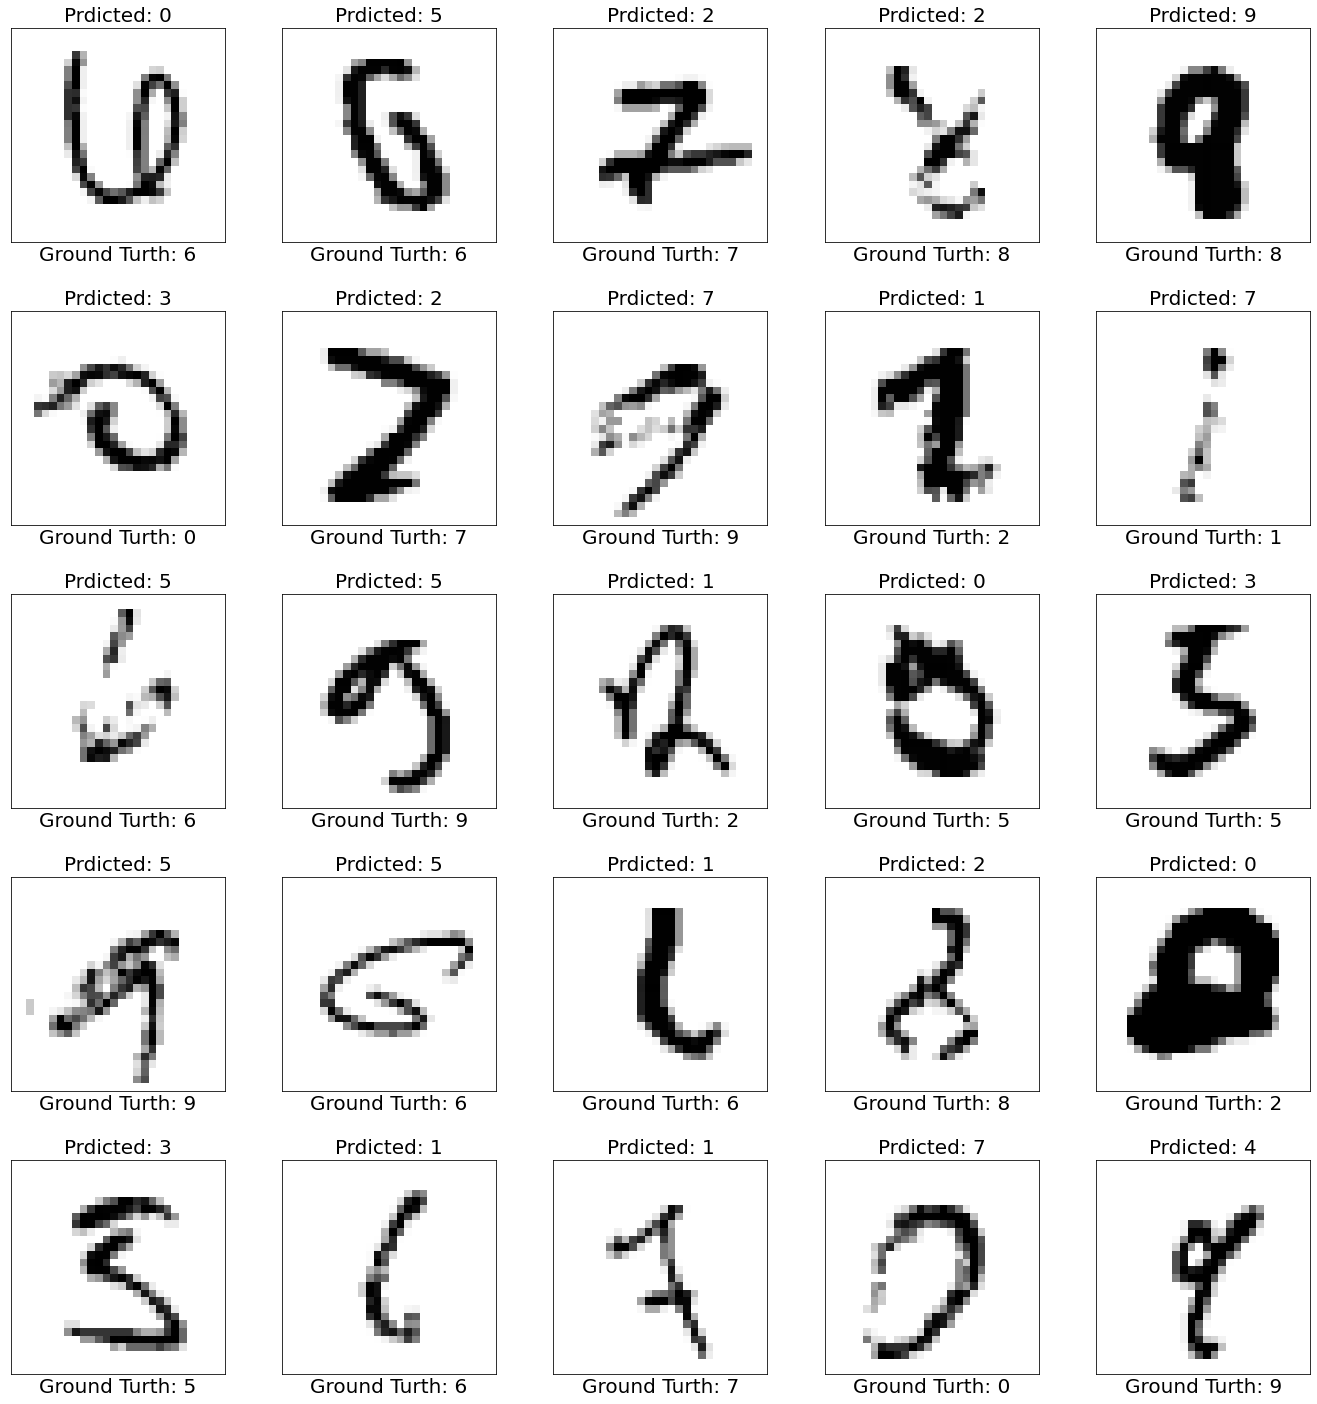

In [0]:
def mis():
  figure = plt.figure()
  num_of_images = 25
  plt.figure(figsize=(20,20))
  for index in range(0, num_of_images):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[index].cpu().numpy().squeeze(), cmap='gray_r')
    plt.title(f'Prdicted Label: {plab[index]}', fontdict={'fontsize': 20})
    plt.xlabel(f'True Label: {tlab[index]}', fontdict={'fontsize':20})
    plt.tight_layout(pad= 2.5)

import test_misclass as tm
import matplotlib.pyplot as plt
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
list1 = ['NoL1_NoL2 with BN','NoL1_NoL2 with GhostBN']
for i, l in enumerate(list1):
    path = 'savedmodel/'+l+' classifier.pt'
    if i == 0:
        h = m.Net(gbn= False).to(device)
    else:
        h = m.Net(gbn= True).to(device)
    h.load_state_dict(torch.load(path))
    h.eval()
    tlab, plab, img = tm.test(h, device, test_loader)
    #print(tlab)
    mis()